In [88]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.special import jv # type: ignore
import matplotlib.pyplot as plt # type: ignore
from iminuit import Minuit # type: ignore
from iminuit.cost import LeastSquares # type: ignore



In [89]:
def sigPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    f_h = s*h1*np.pi*np.log(s) + s*h2*np.pi/2 + 1j*(s*h1*(np.log(s)**2 - (np.pi**2)/4) + s*h2*np.log(s) + s*h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j*np.sin(np.pi)/np.log(s*np.exp(-1/2 * 1j*np.pi)))
    f_r = (s*CRP)/(np.sin(np.pi/2 * arP)) * s**(arP-1) * (-np.cos(np.pi/2 * arP) + 1j*np.sin(np.pi/2 * arP))

    f_mo = s*o1*(np.log(s)**2 - np.pi**2/4) + s*o2*np.log(s) + s*o3 - 1j*(s*o1*np.pi*np.log(s) + s*o2*np.pi/2)
    f_op = s*COP*(np.sin(np.pi/2))/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_r = -(s*CRM)/(np.cos(np.pi/2 * arM)) * s**(arM-1) * (np.sin(np.pi/2 * arM) + 1j*np.cos(np.pi/2 * arM))

    F = 0.389379323/s * ((f_h+f_p+f_pp+f_r).imag + (f_mo+f_op+f_r).imag)
    return(F)
    
def sigPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    f_h = s*h1*np.pi*np.log(s) + s*h2*np.pi/2 + 1j*(s*h1*(np.log(s)**2 - (np.pi**2)/4) + s*h2*np.log(s) + s*h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j*np.sin(np.pi)/np.log(s*np.exp(-1/2 * 1j*np.pi)))
    f_r = (s*CRP)/(np.sin(np.pi/2 * arP)) * s**(arP-1) * (-np.cos(np.pi/2 * arP) + 1j*np.sin(np.pi/2 * arP))

    f_mo = s*o1*(np.log(s)**2 - np.pi**2/4) + s*o2*np.log(s) + s*o3 - 1j*(s*o1*np.pi*np.log(s) + s*o2*np.pi/2)
    f_op = s*COP*(np.sin(np.pi/2))/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_r = -(s*CRM)/(np.cos(np.pi/2 * arM)) * s**(arM-1) * (np.sin(np.pi/2 * arM) + 1j*np.cos(np.pi/2 * arM))

    F = 0.389379323/s * ((f_h+f_p+f_pp+f_r).imag - (f_mo+f_op+f_r).imag)
    return(F)

def rhoPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    f_h = s*h1*np.pi*np.log(s) + s*h2*np.pi/2 + 1j*(s*h1*(np.log(s)**2 - (np.pi**2)/4) + s*h2*np.log(s) + s*h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j*np.sin(np.pi)/np.log(s*np.exp(-1/2 * 1j*np.pi)))
    f_r = (s*CRP)/(np.sin(np.pi/2 * arP)) * s**(arP-1) * (-np.cos(np.pi/2 * arP) + 1j*np.sin(np.pi/2 * arP))

    f_mo = s*o1*(np.log(s)**2 - np.pi**2/4) + s*o2*np.log(s) + s*o3 - 1j*(s*o1*np.pi*np.log(s) + s*o2*np.pi/2)
    f_op = s*COP*(np.sin(np.pi/2))/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_r = -(s*CRM)/(np.cos(np.pi/2 * arM)) * s**(arM-1) * (np.sin(np.pi/2 * arM) + 1j*np.cos(np.pi/2 * arM))

    F = 0.389379323/s * ((f_h+f_p+f_pp+f_r) + (f_mo+f_op+f_r))

    rho = F.real/F.imag
    return(rho)


def rhoPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    f_h = s*h1*np.pi*np.log(s) + s*h2*np.pi/2 + 1j*(s*h1*(np.log(s)**2 - (np.pi**2)/4) + s*h2*np.log(s) + s*h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j*np.sin(np.pi)/np.log(s*np.exp(-1/2 * 1j*np.pi)))
    f_r = (s*CRP)/(np.sin(np.pi/2 * arP)) * s**(arP-1) * (-np.cos(np.pi/2 * arP) + 1j*np.sin(np.pi/2 * arP))

    f_mo = s*o1*(np.log(s)**2 - np.pi**2/4) + s*o2*np.log(s) + s*o3 - 1j*(s*o1*np.pi*np.log(s) + s*o2*np.pi/2)
    f_op = s*COP*(np.sin(np.pi/2))/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_r = -(s*CRM)/(np.cos(np.pi/2 * arM)) * s**(arM-1) * (np.sin(np.pi/2 * arM) + 1j*np.cos(np.pi/2 * arM))

    F = 0.389379323/s * ((f_h+f_p+f_pp+f_r) - (f_mo+f_op+f_r))

    rho = F.real/F.imag
    return(rho)


In [ ]:
# Calculo do F p-p   
def F7(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = arP - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = alpha0P + 0.25*t
    alphaPP = alpha0P + 0.25/2 *t
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = alpha0P + arOL*t
    alphaOP = alpha0P + arOL*0.25/(arOL+0.25)*t
    alphaRPM = aRPM + 0.88*0.25/(0.88*0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(-betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(-betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2
    return(f.real)
def F8(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    s = 8000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = arP - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = alpha0P + 0.25*t
    alphaPP = alpha0P + 0.25/2 *t
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = alpha0P + arOL*t
    alphaOP = alpha0P + arOL*0.25/(arOL+0.25)*t
    alphaRPM = aRPM + 0.88*0.25/(0.88*0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(-betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(-betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2
    return(f.real)

def F13(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    s = 13000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = arP - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = alpha0P + 0.25*t
    alphaPP = alpha0P + 0.25/2 *t
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = alpha0P + arOL*t
    alphaOP = alpha0P + arOL*0.25/(arOL+0.25)*t
    alphaRPM = aRPM + 0.88*0.25/(0.88*0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
#    if kM == 0:
 #       print('Deu zero Km')
  #  if tau == 0:
   #     print('Deu zero tau')
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(-betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(-betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1/2 * 1j * np.pi))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2

    return(f.real)

In [91]:
dat = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True)
x_values = []
y_values = []
yerr_values = []

for i in range(0, len(dat)):

    if i==79: #sig_pp 0 
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, nrows=79)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==80: #sig_ppbar 1
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==111: #rho_pp 2
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=52)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==164: #rho_ppbar 3
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=12)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==177: #dsig 7000 4
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=41)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==219: #dsig 8000 5
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==250: #dsig 13000 6
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c) 
    
    
    i =+ 1    

In [92]:
lsq0 = LeastSquares(x_values[0], y_values[0], yerr_values[0], sigPP)
lsq1 = LeastSquares(x_values[1], y_values[1], yerr_values[1], sigPP_bar)
lsq2 = LeastSquares(x_values[2], y_values[2], yerr_values[2], rhoPP)
lsq3 = LeastSquares(x_values[3], y_values[3], yerr_values[3], rhoPP_bar)
lsq4 = LeastSquares(x_values[4], y_values[4], yerr_values[4], F7)
lsq5 = LeastSquares(x_values[5], y_values[5], yerr_values[5], F8)
lsq6 = LeastSquares(x_values[6], y_values[6], yerr_values[6], F13)



lsqT = lsq0 + lsq1 + lsq2 + lsq3 + lsq4 + lsq5 + lsq6



m = Minuit(lsqT, h1=0.43, h2=-3.86, h3=9.2, b1P=4.56, b2P=7.17, b3P=6.02, b1M=8.95, b2M=3.45, b3M=1.1, kP=0.65, kM=1.12, o1=0.06, o2=-1.41, o3=0.35,  arP=0.48, arM=0.34, arPP=-0.56, arOL=0.057, aRPM=0.7, CP=40.43, CPP=9.20, COP=11.83, CRP=38.18, CRM=47.09, CRPP=-1930.1, CO=7.73, CRPM=8592.7, betaP=4.37, betaRP=0.03, betaRM=33.6, betaPP=1.95, betaRPP=0.79, betaO=5.33, betaOP=1.73, betaRPM=7.33)
#m.limits['kP'] = 

m.migrad()
m.hesse()

/home/macedo/.local/lib/python3.10/site-packages/iminuit/cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
/tmp/ipykernel_3423/865928608.py:22: RuntimeWarning: invalid value encountered in divide
  p1 = np.exp(-b1P * t) * h1 * np.log(s_bar)**2 * (2 * jv(1, kP * tau)) / denominator
/tmp/ipykernel_3423/865928608.py:27: RuntimeWarning: invalid value encountered in divide
  p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
/tmp/ipykernel_3423/865928608.py:65: RuntimeWarning: invalid value encountered in divide
  p1 = np.exp(-b1P * t) * h1 * np.log(s_bar)**2 * (2 * jv(1, kP * tau)) / denominator
/tmp/ipykernel_3423/865928608.py:70: RuntimeWarning: invalid value encountered in divide
  p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
/tmp/ipykernel_3423/865928608.py:109: RuntimeWarning: invalid value encountered in divide
  p1 = np.exp(-b1P * t) * h1 * np.log(s_bar)**2 * (2 * jv(1, kP * tau)) / denominator
/tmp/ipykernel_3423/86

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 394.9 (χ²/ndof = 1.2)      │             Nfcn = 10602             │
│ EDM = 8.15 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h1      │   0.950   │   0.004   │            │            │         │         │       │
│ 1 │ h2      │   -9.72   │   0.06    │            │            │         │         │       │
│ 2 │ h3      │   79.78   │   0.30    │            │            │         │         │       │
│ 3 │ o1      │  -0.0206  │  0.0012   │            │            │         │         │       │
│ 4 │ o2      │   0.736   │   0.034   │            │            │         │         │       │
│ 5 │ o3      │   1.76    │   0.29    │            │            │         │         │       │
│ 6 │ arP     │   1.005   │   0.004   │            │            │         │         │       │
│ 7 │ arM     │   -0.4    │    2.4    │            │            │         │         │       │
│ 8 │ CP      │   50.81   │   0.25    │            │            │         │         │       │
│ 9 │ CPP     │   -80.0   │    0.5    │            │            │         │         │       │
│ 10│ COP     │   -66.9   │    0.5    │            │            │         │         │       │
│ 11│ CRP     │   23.6    │    0.5    │            │            │         │         │       │
│ 12│ CRM     │    5.8    │    0.5    │            │            │         │         │       │
│ 13│ b1P     │   7.65    │   0.08    │            │            │         │         │       │
│ 14│ b2P     │   13.6    │    0.4    │            │            │         │         │       │
│ 15│ b3P     │   64.1    │    0.5    │            │            │         │         │       │
│ 16│ b1M     │   -28.4   │    0.4    │            │            │         │         │       │
│ 17│ b2M     │    6.3    │    0.4    │            │            │         │         │       │
│ 18│ b3M     │   34.0    │    0.5    │            │            │         │         │       │
│ 19│ kP      │  0.4007   │  0.0031   │            │            │         │         │       │
│ 20│ kM      │   1.089   │   0.006   │            │            │         │         │       │
│ 21│ arPP    │  1.1371   │  0.0005   │            │            │         │         │       │
│ 22│ arOL    │   3.391   │   0.006   │            │            │         │         │       │
│ 23│ aRPM    │   1.319   │   0.004   │            │            │         │         │       │
│ 24│ CRPP    │-16.9459e3 │ 0.0005e3  │            │            │         │         │       │
│ 25│ CO      │   31.61   │   0.28    │            │            │         │         │       │
│ 26│ CRPM    │ -9.7067e3 │ 0.0005e3  │            │            │         │         │       │
│ 27│ betaP   │   0.88    │   0.10    │            │            │         │         │       │
│ 28│ betaRP  │    7.1    │    0.5    │            │            │         │         │       │
│ 29│ betaRM  │   -38.2   │    0.5    │            │            │         │     

In [93]:
m.params

    

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,h1,0.950,0.004,,,,,
1,h2,-9.72,0.06,,,,,
2,h3,79.78,0.30,,,,,
3,o1,-0.0206,0.0012,,,,,
4,o2,0.736,0.034,,,,,
5,o3,1.76,0.29,,,,,
6,arP,1.005,0.004,,,,,
7,arM,-0.4,2.4,,,,,
8,CP,50.81,0.25,,,,,
9,CPP,-80.0,0.5,,,,,


In [94]:
h1 = m.values[0]
h2 = m.values[1]
h3 = m.values[2]
b1P = m.values[13]
b2P = m.values[14]
b3P = m.values[15]
b1M = m.values[16]
b2M = m.values[17]
b3M = m.values[18]
kP = m.values[19]
kM = m.values[20]
o1 = m.values[3]
o2 = m.values[4]
o3 = m.values[5]
arP = m.values[6]
arM = m.values[7]
arPP = m.values[21]
arOL = m.values[22]
aRPM = m.values[23]
CP = m.values[8]
CPP = m.values[9]
COP = m.values[10]
CRP = m.values[11]
CRM = m.values[12]
CRPP = m.values[24]
CO = m.values[25]
CRPM = m.values[26]
betaP = m.values[27]
betaRP = m.values[29]
betaRM = m.values[28]
betaPP = m.values[30]
betaRPP = m.values[31]
betaO = m.values[32]
betaOP = m.values[33]
betaRPM = m.values[34]

sqrt_s = np.linspace(10, 10**4+4000, 10000)

In [95]:
t = np.linspace(1, 10000, 10000)
s = 13000**2
s0 = 1
s_bar = -1j*s
t0 = 1
tau = (t/t0)**(1/2) * np.log(s_bar)

for i in range(1, 1000000):

    tau = (i/t0)**(1/2) * np.log(s_bar)
    valor = kP*tau
    if valor == 0:
        print('0')


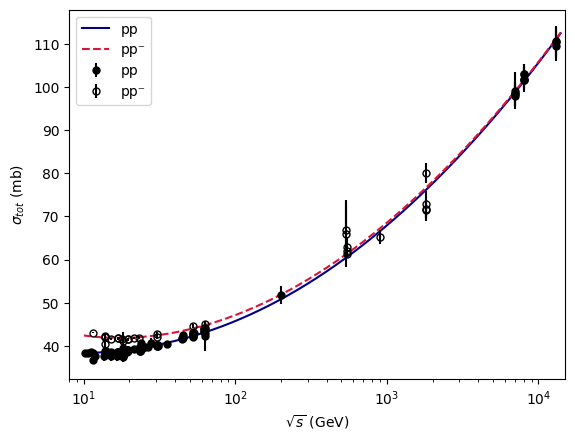

In [96]:
pp = sigPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
pp_bar = sigPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, pp, label='pp', color='darkblue')
plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.plot(sqrt_s,pp_bar, label='pp⁻', color='crimson', linestyle='--')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xlim(8, 15000)
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.legend()
plt.show()

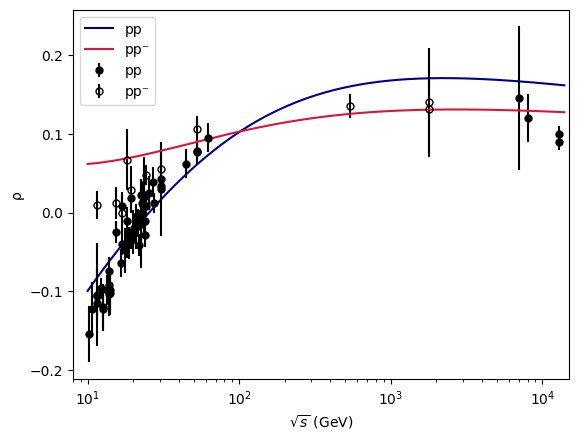

In [97]:
rho_pp = rhoPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
rho_pp_bar = rhoPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, rho_pp, color='darkblue', label='pp')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.plot(sqrt_s, rho_pp_bar, color='crimson', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('ρ')
plt.legend()
plt.xlim(8, 15000)
plt.show()

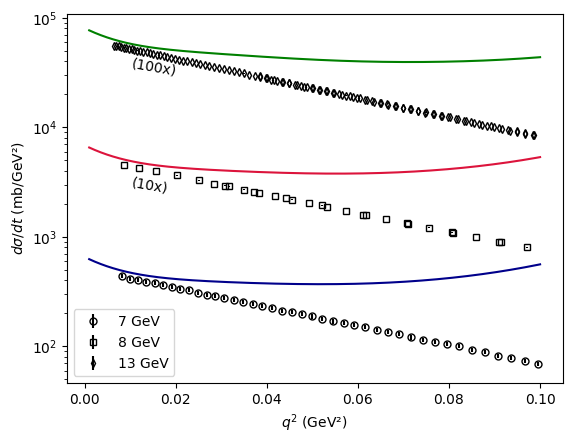

In [98]:
t = np.linspace(0.001, 0.1, 10000)

sig7 = F7(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig8 = F8(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig13 = F13(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)


plt.plot(t, sig7, color='darkblue')
plt.plot(t, 10*sig8, color='crimson')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.plot(t, 100*sig13, color='green')
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=4, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
plt.xlabel('$q^2$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.savefig('dsig_dt')
plt.legend(loc='best')
plt.show()

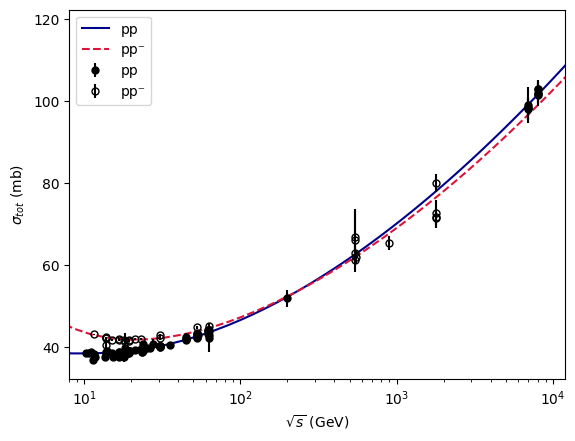

In [99]:


s_values = []
sig_tot = []

df = pd.read_csv('data/sig_pp.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/sig_pp_bar.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue', label='pp')
plt.plot(df0['sqrt_s'].to_numpy(), df0['sig_tot'].to_numpy(), color='crimson', linestyle='--', label='pp⁻')

plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.xlim(8, 10**4+2000)
plt.savefig('sig_tot.png')
plt.legend()
plt.show()



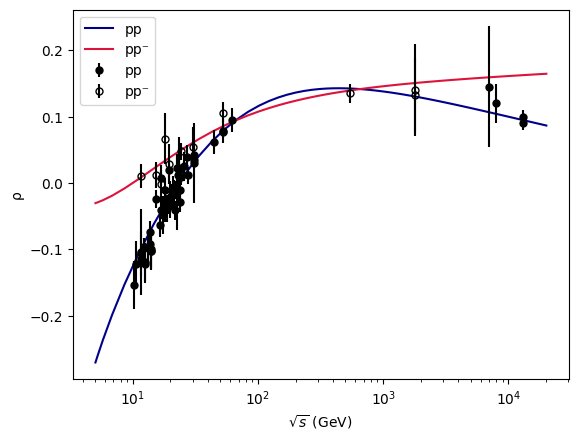

In [100]:
s_values = []
sig_tot = []

df = pd.read_csv('data/rho_pp.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/rho_pp_bar.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue', label='pp')
plt.plot(df0['sqrt_s'].to_numpy(), df0['sig_tot'].to_numpy(), color='crimson', label='pp⁻')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV) ')
plt.ylabel('ρ')
plt.savefig('rho.png')
plt.legend()
plt.show()


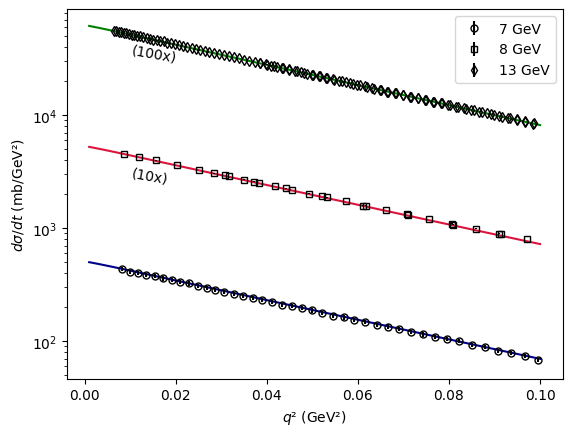

In [101]:
s_values = []
sig_tot = []

df = pd.read_csv('data/dsig7.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/dsig8.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

df1 = pd.read_csv('data/dsig13.dat', delim_whitespace=True)
df1.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue')
plt.plot(df0['sqrt_s'].to_numpy(), 10*df0['sig_tot'].to_numpy(), color='crimson')
plt.plot(df1['sqrt_s'].to_numpy(), 100*df1['sig_tot'].to_numpy(), color='green')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=5, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
plt.xlabel('$q²$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.savefig('dsigdt.png')
plt.legend()
plt.show()
